In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, InputLayer
from keras.optimizers import Adadelta
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from config import *

In [2]:
df = pd.read_excel(filename_all)

df['Date']  = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

# Month
df['Month']  = df['Date'].dt.strftime('%m')
df['Month'] = df['Month'].apply(lambda x: int(x))

# Day
df['Day'] = df['Date'].dt.strftime('%d')
df['Day'] = df['Day'].apply(lambda x: int(x))

# Week
df['Week']  = df['Date'].dt.isocalendar().week
df['Week'] = df['Week'].apply(lambda x: int(x))

df['week_cos'] = np.cos(2 * np.pi * df['Week'] / 7)
df['week_sin'] = np.sin(2 * np.pi * df['Week'] / 7)

df['month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)

df['day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)
df['day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)

In [3]:
df = df[['month_cos', 'month_sin', 'week_cos', 'week_sin', 'first']]

output = len(df['first'].unique())

In [4]:
X = df.drop('first', axis = 1)
y = df['first']
y = y.to_numpy()

scaler  = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_Y)

X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = test_size, random_state = rand_state)

In [13]:
#def baseline_model():
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], )))
#model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.65))
#model.add(Dense(250, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(125, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(output, activation='softmax'))
    
adadelta = Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-07)
    
model.compile(loss='categorical_crossentropy', optimizer=adadelta, metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 3000, verbose = 1, validation_data = (X_test, y_test))

#prediction_test = model.predict(X_test)



    #return model

#estimator = KerasClassifier(build_fn=baseline_model, epochs=2000, batch_size=10, verbose=1)
#kfold = KFold(n_splits=10, shuffle=True)
#results = cross_val_score(estimator, X, dummy_y, cv=kfold)


Epoch 1/3000
58/58 [==============================] - 1s 8ms/step - loss: 3.3188 - accuracy: 0.0284 - val_loss: 3.2449 - val_accuracy: 0.0215
Epoch 2/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.3125 - accuracy: 0.0266 - val_loss: 3.2446 - val_accuracy: 0.0215
Epoch 3/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2959 - accuracy: 0.0486 - val_loss: 3.2444 - val_accuracy: 0.0215
Epoch 4/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2956 - accuracy: 0.0394 - val_loss: 3.2442 - val_accuracy: 0.0215
Epoch 5/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.3030 - accuracy: 0.0279 - val_loss: 3.2440 - val_accuracy: 0.0215
Epoch 6/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.3137 - accuracy: 0.0240 - val_loss: 3.2438 - val_accuracy: 0.0215
Epoch 7/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.3075 - accuracy: 0.0357 - val_loss: 3.2435 - val_accuracy: 0.0215
Epoch 

58/58 [==============================] - 0s 2ms/step - loss: 3.2628 - accuracy: 0.0315 - val_loss: 3.2313 - val_accuracy: 0.0215
Epoch 59/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.2981 - accuracy: 0.0346 - val_loss: 3.2310 - val_accuracy: 0.0215
Epoch 60/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2752 - accuracy: 0.0348 - val_loss: 3.2308 - val_accuracy: 0.0215
Epoch 61/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2680 - accuracy: 0.0396 - val_loss: 3.2305 - val_accuracy: 0.0215
Epoch 62/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2894 - accuracy: 0.0391 - val_loss: 3.2303 - val_accuracy: 0.0215
Epoch 63/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2915 - accuracy: 0.0433 - val_loss: 3.2300 - val_accuracy: 0.0215
Epoch 64/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2790 - accuracy: 0.0397 - val_loss: 3.2298 - val_accuracy: 0.0215
Epoch 65/3000

58/58 [==============================] - 0s 2ms/step - loss: 3.2681 - accuracy: 0.0351 - val_loss: 3.2171 - val_accuracy: 0.0246
Epoch 116/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2835 - accuracy: 0.0468 - val_loss: 3.2168 - val_accuracy: 0.0246
Epoch 117/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.2607 - accuracy: 0.0449 - val_loss: 3.2166 - val_accuracy: 0.0246
Epoch 118/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.2630 - accuracy: 0.0364 - val_loss: 3.2163 - val_accuracy: 0.0246
Epoch 119/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2665 - accuracy: 0.0375 - val_loss: 3.2161 - val_accuracy: 0.0246
Epoch 120/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.2701 - accuracy: 0.0435 - val_loss: 3.2158 - val_accuracy: 0.0246
Epoch 121/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.2638 - accuracy: 0.0429 - val_loss: 3.2156 - val_accuracy: 0.0246
Epoch 1

Epoch 172/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.2447 - accuracy: 0.0615 - val_loss: 3.2031 - val_accuracy: 0.0215
Epoch 173/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2542 - accuracy: 0.0538 - val_loss: 3.2028 - val_accuracy: 0.0215
Epoch 174/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2503 - accuracy: 0.0480 - val_loss: 3.2026 - val_accuracy: 0.0215
Epoch 175/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2529 - accuracy: 0.0525 - val_loss: 3.2024 - val_accuracy: 0.0215
Epoch 176/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2450 - accuracy: 0.0493 - val_loss: 3.2021 - val_accuracy: 0.0215
Epoch 177/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.2477 - accuracy: 0.0548 - val_loss: 3.2019 - val_accuracy: 0.0215
Epoch 178/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2442 - accuracy: 0.0541 - val_loss: 3.2016 - val_accuracy:

Epoch 229/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2461 - accuracy: 0.0416 - val_loss: 3.1896 - val_accuracy: 0.0277
Epoch 230/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2505 - accuracy: 0.0513 - val_loss: 3.1893 - val_accuracy: 0.0277
Epoch 231/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.2313 - accuracy: 0.0604 - val_loss: 3.1891 - val_accuracy: 0.0338
Epoch 232/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.2305 - accuracy: 0.0611 - val_loss: 3.1889 - val_accuracy: 0.0338
Epoch 233/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2353 - accuracy: 0.0652 - val_loss: 3.1886 - val_accuracy: 0.0338
Epoch 234/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2369 - accuracy: 0.0536 - val_loss: 3.1884 - val_accuracy: 0.0338
Epoch 235/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2361 - accuracy: 0.0578 - val_loss: 3.1882 - val_accuracy:

Epoch 286/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.2111 - accuracy: 0.0819 - val_loss: 3.1765 - val_accuracy: 0.0338
Epoch 287/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2356 - accuracy: 0.0455 - val_loss: 3.1763 - val_accuracy: 0.0338
Epoch 288/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2222 - accuracy: 0.0629 - val_loss: 3.1761 - val_accuracy: 0.0338
Epoch 289/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.2270 - accuracy: 0.0524 - val_loss: 3.1759 - val_accuracy: 0.0338
Epoch 290/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.2200 - accuracy: 0.0630 - val_loss: 3.1756 - val_accuracy: 0.0338
Epoch 291/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2180 - accuracy: 0.0656 - val_loss: 3.1754 - val_accuracy: 0.0338
Epoch 292/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.2268 - accuracy: 0.0586 - val_loss: 3.1752 - val_accuracy:

Epoch 343/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1958 - accuracy: 0.0589 - val_loss: 3.1639 - val_accuracy: 0.0462
Epoch 344/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2091 - accuracy: 0.0759 - val_loss: 3.1637 - val_accuracy: 0.0462
Epoch 345/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1989 - accuracy: 0.0632 - val_loss: 3.1635 - val_accuracy: 0.0462
Epoch 346/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1871 - accuracy: 0.0685 - val_loss: 3.1633 - val_accuracy: 0.0462
Epoch 347/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1898 - accuracy: 0.0804 - val_loss: 3.1630 - val_accuracy: 0.0462
Epoch 348/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2047 - accuracy: 0.0640 - val_loss: 3.1628 - val_accuracy: 0.0462
Epoch 349/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2062 - accuracy: 0.0793 - val_loss: 3.1626 - val_accuracy:

Epoch 400/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1903 - accuracy: 0.0600 - val_loss: 3.1518 - val_accuracy: 0.0585
Epoch 401/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1940 - accuracy: 0.0691 - val_loss: 3.1516 - val_accuracy: 0.0585
Epoch 402/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1944 - accuracy: 0.0818 - val_loss: 3.1514 - val_accuracy: 0.0585
Epoch 403/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1987 - accuracy: 0.0769 - val_loss: 3.1512 - val_accuracy: 0.0585
Epoch 404/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1730 - accuracy: 0.0744 - val_loss: 3.1510 - val_accuracy: 0.0585
Epoch 405/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2029 - accuracy: 0.0717 - val_loss: 3.1508 - val_accuracy: 0.0585
Epoch 406/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1953 - accuracy: 0.0784 - val_loss: 3.1506 - val_accuracy:

Epoch 457/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1771 - accuracy: 0.0812 - val_loss: 3.1402 - val_accuracy: 0.0769
Epoch 458/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1838 - accuracy: 0.0772 - val_loss: 3.1400 - val_accuracy: 0.0769
Epoch 459/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1941 - accuracy: 0.0623 - val_loss: 3.1398 - val_accuracy: 0.0769
Epoch 460/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1788 - accuracy: 0.0707 - val_loss: 3.1396 - val_accuracy: 0.0769
Epoch 461/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1707 - accuracy: 0.0861 - val_loss: 3.1394 - val_accuracy: 0.0769
Epoch 462/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1692 - accuracy: 0.0711 - val_loss: 3.1393 - val_accuracy: 0.0769
Epoch 463/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1669 - accuracy: 0.0736 - val_loss: 3.1391 - val_accuracy:

Epoch 514/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1700 - accuracy: 0.0813 - val_loss: 3.1291 - val_accuracy: 0.1015
Epoch 515/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1625 - accuracy: 0.0881 - val_loss: 3.1289 - val_accuracy: 0.1015
Epoch 516/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1475 - accuracy: 0.0840 - val_loss: 3.1287 - val_accuracy: 0.1015
Epoch 517/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1645 - accuracy: 0.0800 - val_loss: 3.1285 - val_accuracy: 0.1015
Epoch 518/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1656 - accuracy: 0.0900 - val_loss: 3.1283 - val_accuracy: 0.1015
Epoch 519/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1547 - accuracy: 0.0950 - val_loss: 3.1281 - val_accuracy: 0.1077
Epoch 520/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1607 - accuracy: 0.0866 - val_loss: 3.1280 - val_accuracy:

Epoch 571/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1457 - accuracy: 0.0731 - val_loss: 3.1184 - val_accuracy: 0.1200
Epoch 572/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1558 - accuracy: 0.0843 - val_loss: 3.1182 - val_accuracy: 0.1200
Epoch 573/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1497 - accuracy: 0.0908 - val_loss: 3.1180 - val_accuracy: 0.1200
Epoch 574/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1270 - accuracy: 0.1009 - val_loss: 3.1178 - val_accuracy: 0.1200
Epoch 575/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1499 - accuracy: 0.0977 - val_loss: 3.1176 - val_accuracy: 0.1200
Epoch 576/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1351 - accuracy: 0.0988 - val_loss: 3.1175 - val_accuracy: 0.1200
Epoch 577/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1639 - accuracy: 0.0937 - val_loss: 3.1173 - val_accuracy:

Epoch 628/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1501 - accuracy: 0.0981 - val_loss: 3.1080 - val_accuracy: 0.1385
Epoch 629/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1597 - accuracy: 0.0768 - val_loss: 3.1079 - val_accuracy: 0.1385
Epoch 630/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1254 - accuracy: 0.0952 - val_loss: 3.1077 - val_accuracy: 0.1385
Epoch 631/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1359 - accuracy: 0.0883 - val_loss: 3.1075 - val_accuracy: 0.1385
Epoch 632/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1475 - accuracy: 0.0939 - val_loss: 3.1073 - val_accuracy: 0.1385
Epoch 633/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1201 - accuracy: 0.1045 - val_loss: 3.1071 - val_accuracy: 0.1385
Epoch 634/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1521 - accuracy: 0.0937 - val_loss: 3.1070 - val_accuracy:

Epoch 685/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1233 - accuracy: 0.0903 - val_loss: 3.0980 - val_accuracy: 0.1508
Epoch 686/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1255 - accuracy: 0.1017 - val_loss: 3.0978 - val_accuracy: 0.1508
Epoch 687/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1301 - accuracy: 0.0860 - val_loss: 3.0977 - val_accuracy: 0.1508
Epoch 688/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1235 - accuracy: 0.0868 - val_loss: 3.0975 - val_accuracy: 0.1508
Epoch 689/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1125 - accuracy: 0.0873 - val_loss: 3.0973 - val_accuracy: 0.1508
Epoch 690/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1210 - accuracy: 0.0943 - val_loss: 3.0971 - val_accuracy: 0.1508
Epoch 691/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1231 - accuracy: 0.1083 - val_loss: 3.0970 - val_accuracy:

Epoch 742/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1057 - accuracy: 0.0935 - val_loss: 3.0883 - val_accuracy: 0.1508
Epoch 743/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1173 - accuracy: 0.0908 - val_loss: 3.0881 - val_accuracy: 0.1508
Epoch 744/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1092 - accuracy: 0.1163 - val_loss: 3.0880 - val_accuracy: 0.1508
Epoch 745/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1113 - accuracy: 0.1004 - val_loss: 3.0878 - val_accuracy: 0.1508
Epoch 746/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1192 - accuracy: 0.1025 - val_loss: 3.0876 - val_accuracy: 0.1508
Epoch 747/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1057 - accuracy: 0.1004 - val_loss: 3.0875 - val_accuracy: 0.1508
Epoch 748/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1058 - accuracy: 0.1115 - val_loss: 3.0873 - val_accuracy:

Epoch 799/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0995 - accuracy: 0.1102 - val_loss: 3.0789 - val_accuracy: 0.1508
Epoch 800/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1075 - accuracy: 0.0944 - val_loss: 3.0787 - val_accuracy: 0.1508
Epoch 801/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1137 - accuracy: 0.1069 - val_loss: 3.0786 - val_accuracy: 0.1508
Epoch 802/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1124 - accuracy: 0.0961 - val_loss: 3.0784 - val_accuracy: 0.1508
Epoch 803/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1113 - accuracy: 0.0965 - val_loss: 3.0783 - val_accuracy: 0.1508
Epoch 804/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0972 - accuracy: 0.0977 - val_loss: 3.0781 - val_accuracy: 0.1508
Epoch 805/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0929 - accuracy: 0.1163 - val_loss: 3.0779 - val_accuracy:

Epoch 856/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0902 - accuracy: 0.1113 - val_loss: 3.0699 - val_accuracy: 0.1508
Epoch 857/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0802 - accuracy: 0.1089 - val_loss: 3.0697 - val_accuracy: 0.1508
Epoch 858/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1053 - accuracy: 0.1028 - val_loss: 3.0695 - val_accuracy: 0.1508
Epoch 859/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1020 - accuracy: 0.1028 - val_loss: 3.0694 - val_accuracy: 0.1508
Epoch 860/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0851 - accuracy: 0.1201 - val_loss: 3.0692 - val_accuracy: 0.1508
Epoch 861/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.1006 - accuracy: 0.1122 - val_loss: 3.0691 - val_accuracy: 0.1508
Epoch 862/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0812 - accuracy: 0.1087 - val_loss: 3.0689 - val_accuracy:

58/58 [==============================] - 0s 1ms/step - loss: 3.0711 - accuracy: 0.1294 - val_loss: 3.0612 - val_accuracy: 0.1538
Epoch 913/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0820 - accuracy: 0.1071 - val_loss: 3.0610 - val_accuracy: 0.1538
Epoch 914/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0664 - accuracy: 0.1241 - val_loss: 3.0609 - val_accuracy: 0.1538
Epoch 915/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0772 - accuracy: 0.1166 - val_loss: 3.0607 - val_accuracy: 0.1538
Epoch 916/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0662 - accuracy: 0.1029 - val_loss: 3.0606 - val_accuracy: 0.1538
Epoch 917/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0839 - accuracy: 0.1164 - val_loss: 3.0604 - val_accuracy: 0.1538
Epoch 918/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0665 - accuracy: 0.1169 - val_loss: 3.0603 - val_accuracy: 0.1538
Epoch 9

Epoch 969/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0690 - accuracy: 0.1006 - val_loss: 3.0525 - val_accuracy: 0.1569
Epoch 970/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0597 - accuracy: 0.1209 - val_loss: 3.0524 - val_accuracy: 0.1569
Epoch 971/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0675 - accuracy: 0.1130 - val_loss: 3.0522 - val_accuracy: 0.1569
Epoch 972/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0739 - accuracy: 0.1092 - val_loss: 3.0521 - val_accuracy: 0.1569
Epoch 973/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0739 - accuracy: 0.1074 - val_loss: 3.0519 - val_accuracy: 0.1569
Epoch 974/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0620 - accuracy: 0.1146 - val_loss: 3.0518 - val_accuracy: 0.1569
Epoch 975/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0524 - accuracy: 0.1133 - val_loss: 3.0517 - val_accuracy:

Epoch 1026/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0833 - accuracy: 0.1082 - val_loss: 3.0443 - val_accuracy: 0.1569
Epoch 1027/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0499 - accuracy: 0.1165 - val_loss: 3.0441 - val_accuracy: 0.1569
Epoch 1028/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0710 - accuracy: 0.1165 - val_loss: 3.0440 - val_accuracy: 0.1569
Epoch 1029/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0582 - accuracy: 0.1145 - val_loss: 3.0438 - val_accuracy: 0.1569
Epoch 1030/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0611 - accuracy: 0.1206 - val_loss: 3.0437 - val_accuracy: 0.1569
Epoch 1031/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0789 - accuracy: 0.0845 - val_loss: 3.0436 - val_accuracy: 0.1569
Epoch 1032/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0643 - accuracy: 0.1069 - val_loss: 3.0434 - val_ac

58/58 [==============================] - 0s 1ms/step - loss: 3.0391 - accuracy: 0.1248 - val_loss: 3.0364 - val_accuracy: 0.1569
Epoch 1083/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0567 - accuracy: 0.0955 - val_loss: 3.0363 - val_accuracy: 0.1569
Epoch 1084/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0578 - accuracy: 0.1089 - val_loss: 3.0361 - val_accuracy: 0.1569
Epoch 1085/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0579 - accuracy: 0.1205 - val_loss: 3.0360 - val_accuracy: 0.1569
Epoch 1086/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0470 - accuracy: 0.1201 - val_loss: 3.0359 - val_accuracy: 0.1569
Epoch 1087/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0459 - accuracy: 0.1208 - val_loss: 3.0357 - val_accuracy: 0.1569
Epoch 1088/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0497 - accuracy: 0.1118 - val_loss: 3.0356 - val_accuracy: 0.1569
E

58/58 [==============================] - 0s 2ms/step - loss: 3.0465 - accuracy: 0.1184 - val_loss: 3.0288 - val_accuracy: 0.1538
Epoch 1139/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0353 - accuracy: 0.1127 - val_loss: 3.0286 - val_accuracy: 0.1538
Epoch 1140/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0471 - accuracy: 0.1368 - val_loss: 3.0285 - val_accuracy: 0.1538
Epoch 1141/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0572 - accuracy: 0.1054 - val_loss: 3.0284 - val_accuracy: 0.1538
Epoch 1142/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0544 - accuracy: 0.1006 - val_loss: 3.0283 - val_accuracy: 0.1538
Epoch 1143/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0370 - accuracy: 0.1031 - val_loss: 3.0281 - val_accuracy: 0.1538
Epoch 1144/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0341 - accuracy: 0.1319 - val_loss: 3.0280 - val_accuracy: 0.1538
E

58/58 [==============================] - 0s 2ms/step - loss: 3.0107 - accuracy: 0.1302 - val_loss: 3.0214 - val_accuracy: 0.1538
Epoch 1195/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0282 - accuracy: 0.1274 - val_loss: 3.0212 - val_accuracy: 0.1538
Epoch 1196/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0315 - accuracy: 0.1250 - val_loss: 3.0211 - val_accuracy: 0.1538
Epoch 1197/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0336 - accuracy: 0.1244 - val_loss: 3.0210 - val_accuracy: 0.1538
Epoch 1198/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0493 - accuracy: 0.1085 - val_loss: 3.0208 - val_accuracy: 0.1538
Epoch 1199/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0456 - accuracy: 0.1190 - val_loss: 3.0207 - val_accuracy: 0.1538
Epoch 1200/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0567 - accuracy: 0.1033 - val_loss: 3.0206 - val_accuracy: 0.1538
E

58/58 [==============================] - 0s 1ms/step - loss: 3.0203 - accuracy: 0.1198 - val_loss: 3.0142 - val_accuracy: 0.1538
Epoch 1251/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0120 - accuracy: 0.1296 - val_loss: 3.0140 - val_accuracy: 0.1538
Epoch 1252/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0017 - accuracy: 0.1382 - val_loss: 3.0139 - val_accuracy: 0.1538
Epoch 1253/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0291 - accuracy: 0.1190 - val_loss: 3.0138 - val_accuracy: 0.1538
Epoch 1254/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0204 - accuracy: 0.1057 - val_loss: 3.0137 - val_accuracy: 0.1538
Epoch 1255/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0186 - accuracy: 0.1293 - val_loss: 3.0135 - val_accuracy: 0.1538
Epoch 1256/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0328 - accuracy: 0.1156 - val_loss: 3.0134 - val_accuracy: 0.1538
E

58/58 [==============================] - 0s 1ms/step - loss: 3.0131 - accuracy: 0.1144 - val_loss: 3.0072 - val_accuracy: 0.1538
Epoch 1307/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0089 - accuracy: 0.1217 - val_loss: 3.0071 - val_accuracy: 0.1538
Epoch 1308/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0133 - accuracy: 0.1243 - val_loss: 3.0069 - val_accuracy: 0.1538
Epoch 1309/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0206 - accuracy: 0.1266 - val_loss: 3.0068 - val_accuracy: 0.1538
Epoch 1310/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0286 - accuracy: 0.0983 - val_loss: 3.0067 - val_accuracy: 0.1538
Epoch 1311/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0343 - accuracy: 0.1170 - val_loss: 3.0066 - val_accuracy: 0.1538
Epoch 1312/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0285 - accuracy: 0.1307 - val_loss: 3.0065 - val_accuracy: 0.1538
E

58/58 [==============================] - 0s 2ms/step - loss: 3.0010 - accuracy: 0.1383 - val_loss: 3.0005 - val_accuracy: 0.1538
Epoch 1363/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0143 - accuracy: 0.1270 - val_loss: 3.0003 - val_accuracy: 0.1538
Epoch 1364/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9945 - accuracy: 0.1292 - val_loss: 3.0002 - val_accuracy: 0.1538
Epoch 1365/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0092 - accuracy: 0.1204 - val_loss: 3.0001 - val_accuracy: 0.1538
Epoch 1366/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0142 - accuracy: 0.1271 - val_loss: 3.0000 - val_accuracy: 0.1538
Epoch 1367/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0112 - accuracy: 0.1086 - val_loss: 2.9999 - val_accuracy: 0.1538
Epoch 1368/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0101 - accuracy: 0.1276 - val_loss: 2.9998 - val_accuracy: 0.1538
E

58/58 [==============================] - 0s 1ms/step - loss: 2.9890 - accuracy: 0.1453 - val_loss: 2.9940 - val_accuracy: 0.1538
Epoch 1419/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0181 - accuracy: 0.1255 - val_loss: 2.9939 - val_accuracy: 0.1538
Epoch 1420/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0235 - accuracy: 0.1218 - val_loss: 2.9938 - val_accuracy: 0.1538
Epoch 1421/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0059 - accuracy: 0.1179 - val_loss: 2.9937 - val_accuracy: 0.1538
Epoch 1422/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9981 - accuracy: 0.1194 - val_loss: 2.9936 - val_accuracy: 0.1538
Epoch 1423/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0138 - accuracy: 0.1075 - val_loss: 2.9934 - val_accuracy: 0.1538
Epoch 1424/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0078 - accuracy: 0.1135 - val_loss: 2.9933 - val_accuracy: 0.1538
E

58/58 [==============================] - 0s 1ms/step - loss: 3.0127 - accuracy: 0.1117 - val_loss: 2.9877 - val_accuracy: 0.1538
Epoch 1475/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9989 - accuracy: 0.1258 - val_loss: 2.9876 - val_accuracy: 0.1538
Epoch 1476/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0154 - accuracy: 0.1166 - val_loss: 2.9875 - val_accuracy: 0.1538
Epoch 1477/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9842 - accuracy: 0.1206 - val_loss: 2.9874 - val_accuracy: 0.1538
Epoch 1478/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9849 - accuracy: 0.1271 - val_loss: 2.9873 - val_accuracy: 0.1538
Epoch 1479/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0141 - accuracy: 0.1241 - val_loss: 2.9872 - val_accuracy: 0.1538
Epoch 1480/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9940 - accuracy: 0.1124 - val_loss: 2.9871 - val_accuracy: 0.1538
E

58/58 [==============================] - 0s 2ms/step - loss: 2.9935 - accuracy: 0.1305 - val_loss: 2.9817 - val_accuracy: 0.1508
Epoch 1531/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9901 - accuracy: 0.1166 - val_loss: 2.9816 - val_accuracy: 0.1508
Epoch 1532/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9950 - accuracy: 0.1303 - val_loss: 2.9815 - val_accuracy: 0.1508
Epoch 1533/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0023 - accuracy: 0.1185 - val_loss: 2.9813 - val_accuracy: 0.1508
Epoch 1534/3000
58/58 [==============================] - 0s 1ms/step - loss: 3.0020 - accuracy: 0.1139 - val_loss: 2.9812 - val_accuracy: 0.1508
Epoch 1535/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9868 - accuracy: 0.1192 - val_loss: 2.9811 - val_accuracy: 0.1508
Epoch 1536/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0009 - accuracy: 0.1322 - val_loss: 2.9810 - val_accuracy: 0.1508
E

58/58 [==============================] - 0s 1ms/step - loss: 2.9801 - accuracy: 0.1350 - val_loss: 2.9758 - val_accuracy: 0.1508
Epoch 1587/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9977 - accuracy: 0.0978 - val_loss: 2.9757 - val_accuracy: 0.1508
Epoch 1588/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9984 - accuracy: 0.1007 - val_loss: 2.9756 - val_accuracy: 0.1508
Epoch 1589/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9593 - accuracy: 0.1318 - val_loss: 2.9755 - val_accuracy: 0.1508
Epoch 1590/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9793 - accuracy: 0.1284 - val_loss: 2.9754 - val_accuracy: 0.1508
Epoch 1591/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9813 - accuracy: 0.1137 - val_loss: 2.9753 - val_accuracy: 0.1508
Epoch 1592/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9828 - accuracy: 0.1305 - val_loss: 2.9752 - val_accuracy: 0.1508
E

58/58 [==============================] - 0s 2ms/step - loss: 2.9668 - accuracy: 0.1310 - val_loss: 2.9701 - val_accuracy: 0.1508
Epoch 1643/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9739 - accuracy: 0.1150 - val_loss: 2.9700 - val_accuracy: 0.1508
Epoch 1644/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9595 - accuracy: 0.1196 - val_loss: 2.9699 - val_accuracy: 0.1508
Epoch 1645/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9695 - accuracy: 0.1164 - val_loss: 2.9698 - val_accuracy: 0.1508
Epoch 1646/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9723 - accuracy: 0.1192 - val_loss: 2.9697 - val_accuracy: 0.1508
Epoch 1647/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9928 - accuracy: 0.1135 - val_loss: 2.9696 - val_accuracy: 0.1508
Epoch 1648/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9759 - accuracy: 0.1257 - val_loss: 2.9695 - val_accuracy: 0.1508
E

58/58 [==============================] - 0s 2ms/step - loss: 2.9734 - accuracy: 0.1219 - val_loss: 2.9647 - val_accuracy: 0.1477
Epoch 1699/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9677 - accuracy: 0.1358 - val_loss: 2.9646 - val_accuracy: 0.1477
Epoch 1700/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9684 - accuracy: 0.1208 - val_loss: 2.9645 - val_accuracy: 0.1477
Epoch 1701/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9757 - accuracy: 0.1146 - val_loss: 2.9644 - val_accuracy: 0.1477
Epoch 1702/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9549 - accuracy: 0.1285 - val_loss: 2.9643 - val_accuracy: 0.1477
Epoch 1703/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9717 - accuracy: 0.1303 - val_loss: 2.9642 - val_accuracy: 0.1477
Epoch 1704/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9837 - accuracy: 0.1226 - val_loss: 2.9641 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 2ms/step - loss: 2.9748 - accuracy: 0.1198 - val_loss: 2.9595 - val_accuracy: 0.1477
Epoch 1755/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9512 - accuracy: 0.1250 - val_loss: 2.9594 - val_accuracy: 0.1477
Epoch 1756/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9724 - accuracy: 0.1199 - val_loss: 2.9593 - val_accuracy: 0.1477
Epoch 1757/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9440 - accuracy: 0.1380 - val_loss: 2.9592 - val_accuracy: 0.1477
Epoch 1758/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9531 - accuracy: 0.1161 - val_loss: 2.9591 - val_accuracy: 0.1477
Epoch 1759/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9695 - accuracy: 0.1362 - val_loss: 2.9590 - val_accuracy: 0.1477
Epoch 1760/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9475 - accuracy: 0.1357 - val_loss: 2.9589 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 1ms/step - loss: 2.9613 - accuracy: 0.1268 - val_loss: 2.9544 - val_accuracy: 0.1477
Epoch 1811/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9460 - accuracy: 0.1390 - val_loss: 2.9543 - val_accuracy: 0.1477
Epoch 1812/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9554 - accuracy: 0.1339 - val_loss: 2.9543 - val_accuracy: 0.1477
Epoch 1813/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9456 - accuracy: 0.1277 - val_loss: 2.9542 - val_accuracy: 0.1477
Epoch 1814/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9432 - accuracy: 0.1321 - val_loss: 2.9541 - val_accuracy: 0.1477
Epoch 1815/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9405 - accuracy: 0.1493 - val_loss: 2.9540 - val_accuracy: 0.1477
Epoch 1816/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9350 - accuracy: 0.1514 - val_loss: 2.9539 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 1ms/step - loss: 2.9441 - accuracy: 0.1248 - val_loss: 2.9496 - val_accuracy: 0.1477
Epoch 1867/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9431 - accuracy: 0.1325 - val_loss: 2.9495 - val_accuracy: 0.1477
Epoch 1868/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9467 - accuracy: 0.1356 - val_loss: 2.9495 - val_accuracy: 0.1477
Epoch 1869/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9699 - accuracy: 0.1089 - val_loss: 2.9494 - val_accuracy: 0.1477
Epoch 1870/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9438 - accuracy: 0.1228 - val_loss: 2.9493 - val_accuracy: 0.1477
Epoch 1871/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9423 - accuracy: 0.1200 - val_loss: 2.9492 - val_accuracy: 0.1477
Epoch 1872/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9457 - accuracy: 0.1193 - val_loss: 2.9491 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 2ms/step - loss: 2.9551 - accuracy: 0.1270 - val_loss: 2.9450 - val_accuracy: 0.1477
Epoch 1923/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9599 - accuracy: 0.1193 - val_loss: 2.9449 - val_accuracy: 0.1477
Epoch 1924/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9269 - accuracy: 0.1328 - val_loss: 2.9449 - val_accuracy: 0.1477
Epoch 1925/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9095 - accuracy: 0.1298 - val_loss: 2.9448 - val_accuracy: 0.1477
Epoch 1926/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9328 - accuracy: 0.1238 - val_loss: 2.9447 - val_accuracy: 0.1477
Epoch 1927/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9353 - accuracy: 0.1111 - val_loss: 2.9446 - val_accuracy: 0.1477
Epoch 1928/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9489 - accuracy: 0.1315 - val_loss: 2.9445 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 1ms/step - loss: 2.9358 - accuracy: 0.1282 - val_loss: 2.9406 - val_accuracy: 0.1477
Epoch 1979/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9368 - accuracy: 0.1229 - val_loss: 2.9406 - val_accuracy: 0.1477
Epoch 1980/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9477 - accuracy: 0.1328 - val_loss: 2.9405 - val_accuracy: 0.1477
Epoch 1981/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9445 - accuracy: 0.1245 - val_loss: 2.9404 - val_accuracy: 0.1477
Epoch 1982/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9325 - accuracy: 0.1202 - val_loss: 2.9403 - val_accuracy: 0.1477
Epoch 1983/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9379 - accuracy: 0.1310 - val_loss: 2.9403 - val_accuracy: 0.1477
Epoch 1984/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9317 - accuracy: 0.1353 - val_loss: 2.9402 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 1ms/step - loss: 2.9221 - accuracy: 0.1162 - val_loss: 2.9365 - val_accuracy: 0.1477
Epoch 2035/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9109 - accuracy: 0.1241 - val_loss: 2.9364 - val_accuracy: 0.1477
Epoch 2036/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9259 - accuracy: 0.1200 - val_loss: 2.9363 - val_accuracy: 0.1477
Epoch 2037/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9148 - accuracy: 0.1370 - val_loss: 2.9362 - val_accuracy: 0.1477
Epoch 2038/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9240 - accuracy: 0.1264 - val_loss: 2.9362 - val_accuracy: 0.1477
Epoch 2039/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9373 - accuracy: 0.1213 - val_loss: 2.9361 - val_accuracy: 0.1477
Epoch 2040/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9178 - accuracy: 0.1490 - val_loss: 2.9360 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 2ms/step - loss: 2.9404 - accuracy: 0.1300 - val_loss: 2.9325 - val_accuracy: 0.1477
Epoch 2091/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9368 - accuracy: 0.1123 - val_loss: 2.9324 - val_accuracy: 0.1477
Epoch 2092/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9214 - accuracy: 0.1248 - val_loss: 2.9323 - val_accuracy: 0.1477
Epoch 2093/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9261 - accuracy: 0.1324 - val_loss: 2.9322 - val_accuracy: 0.1477
Epoch 2094/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9439 - accuracy: 0.1368 - val_loss: 2.9322 - val_accuracy: 0.1477
Epoch 2095/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9077 - accuracy: 0.1289 - val_loss: 2.9321 - val_accuracy: 0.1477
Epoch 2096/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9275 - accuracy: 0.1206 - val_loss: 2.9320 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 1ms/step - loss: 2.9103 - accuracy: 0.1310 - val_loss: 2.9286 - val_accuracy: 0.1477
Epoch 2147/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9246 - accuracy: 0.1287 - val_loss: 2.9285 - val_accuracy: 0.1477
Epoch 2148/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9148 - accuracy: 0.1340 - val_loss: 2.9285 - val_accuracy: 0.1477
Epoch 2149/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9308 - accuracy: 0.1263 - val_loss: 2.9284 - val_accuracy: 0.1477
Epoch 2150/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9135 - accuracy: 0.1415 - val_loss: 2.9283 - val_accuracy: 0.1477
Epoch 2151/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9192 - accuracy: 0.1312 - val_loss: 2.9283 - val_accuracy: 0.1477
Epoch 2152/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9064 - accuracy: 0.1341 - val_loss: 2.9282 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 2ms/step - loss: 2.9136 - accuracy: 0.1145 - val_loss: 2.9250 - val_accuracy: 0.1477
Epoch 2203/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9131 - accuracy: 0.1227 - val_loss: 2.9249 - val_accuracy: 0.1477
Epoch 2204/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9195 - accuracy: 0.1275 - val_loss: 2.9249 - val_accuracy: 0.1477
Epoch 2205/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9201 - accuracy: 0.1259 - val_loss: 2.9248 - val_accuracy: 0.1477
Epoch 2206/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8968 - accuracy: 0.1128 - val_loss: 2.9247 - val_accuracy: 0.1477
Epoch 2207/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9326 - accuracy: 0.1328 - val_loss: 2.9247 - val_accuracy: 0.1477
Epoch 2208/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8958 - accuracy: 0.1350 - val_loss: 2.9246 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 2ms/step - loss: 2.9046 - accuracy: 0.1191 - val_loss: 2.9216 - val_accuracy: 0.1477
Epoch 2259/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9331 - accuracy: 0.1061 - val_loss: 2.9215 - val_accuracy: 0.1477
Epoch 2260/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8993 - accuracy: 0.1391 - val_loss: 2.9215 - val_accuracy: 0.1477
Epoch 2261/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9245 - accuracy: 0.1126 - val_loss: 2.9214 - val_accuracy: 0.1477
Epoch 2262/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9336 - accuracy: 0.1166 - val_loss: 2.9213 - val_accuracy: 0.1477
Epoch 2263/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9211 - accuracy: 0.1251 - val_loss: 2.9213 - val_accuracy: 0.1477
Epoch 2264/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9284 - accuracy: 0.1251 - val_loss: 2.9212 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 1ms/step - loss: 2.9273 - accuracy: 0.1327 - val_loss: 2.9182 - val_accuracy: 0.1477
Epoch 2315/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9155 - accuracy: 0.1115 - val_loss: 2.9182 - val_accuracy: 0.1477
Epoch 2316/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9097 - accuracy: 0.1142 - val_loss: 2.9181 - val_accuracy: 0.1477
Epoch 2317/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9107 - accuracy: 0.1177 - val_loss: 2.9181 - val_accuracy: 0.1477
Epoch 2318/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.8981 - accuracy: 0.1205 - val_loss: 2.9180 - val_accuracy: 0.1477
Epoch 2319/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8948 - accuracy: 0.1283 - val_loss: 2.9180 - val_accuracy: 0.1477
Epoch 2320/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9041 - accuracy: 0.1335 - val_loss: 2.9179 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 2ms/step - loss: 2.9168 - accuracy: 0.1397 - val_loss: 2.9150 - val_accuracy: 0.1477
Epoch 2371/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9135 - accuracy: 0.1322 - val_loss: 2.9150 - val_accuracy: 0.1477
Epoch 2372/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9238 - accuracy: 0.1116 - val_loss: 2.9149 - val_accuracy: 0.1477
Epoch 2373/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9237 - accuracy: 0.1183 - val_loss: 2.9149 - val_accuracy: 0.1477
Epoch 2374/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.8936 - accuracy: 0.1357 - val_loss: 2.9148 - val_accuracy: 0.1477
Epoch 2375/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9093 - accuracy: 0.1210 - val_loss: 2.9148 - val_accuracy: 0.1477
Epoch 2376/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.8851 - accuracy: 0.1394 - val_loss: 2.9147 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 2ms/step - loss: 2.9091 - accuracy: 0.1300 - val_loss: 2.9120 - val_accuracy: 0.1477
Epoch 2427/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9120 - accuracy: 0.1237 - val_loss: 2.9119 - val_accuracy: 0.1477
Epoch 2428/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9080 - accuracy: 0.1250 - val_loss: 2.9119 - val_accuracy: 0.1477
Epoch 2429/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.8983 - accuracy: 0.1364 - val_loss: 2.9118 - val_accuracy: 0.1477
Epoch 2430/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.8958 - accuracy: 0.1215 - val_loss: 2.9117 - val_accuracy: 0.1477
Epoch 2431/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8895 - accuracy: 0.1278 - val_loss: 2.9117 - val_accuracy: 0.1477
Epoch 2432/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8840 - accuracy: 0.1465 - val_loss: 2.9116 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 2ms/step - loss: 2.9070 - accuracy: 0.1229 - val_loss: 2.9090 - val_accuracy: 0.1477
Epoch 2483/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8839 - accuracy: 0.1512 - val_loss: 2.9090 - val_accuracy: 0.1477
Epoch 2484/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8818 - accuracy: 0.1517 - val_loss: 2.9089 - val_accuracy: 0.1477
Epoch 2485/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9042 - accuracy: 0.1346 - val_loss: 2.9089 - val_accuracy: 0.1477
Epoch 2486/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8973 - accuracy: 0.1212 - val_loss: 2.9088 - val_accuracy: 0.1477
Epoch 2487/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9127 - accuracy: 0.1251 - val_loss: 2.9088 - val_accuracy: 0.1477
Epoch 2488/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.9041 - accuracy: 0.1231 - val_loss: 2.9087 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 2ms/step - loss: 2.9020 - accuracy: 0.1246 - val_loss: 2.9062 - val_accuracy: 0.1477
Epoch 2539/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8776 - accuracy: 0.1354 - val_loss: 2.9062 - val_accuracy: 0.1477
Epoch 2540/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.8692 - accuracy: 0.1331 - val_loss: 2.9061 - val_accuracy: 0.1477
Epoch 2541/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.8914 - accuracy: 0.1313 - val_loss: 2.9061 - val_accuracy: 0.1477
Epoch 2542/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.8870 - accuracy: 0.1346 - val_loss: 2.9060 - val_accuracy: 0.1477
Epoch 2543/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9065 - accuracy: 0.1142 - val_loss: 2.9060 - val_accuracy: 0.1477
Epoch 2544/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9055 - accuracy: 0.1253 - val_loss: 2.9059 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 2ms/step - loss: 2.9057 - accuracy: 0.1127 - val_loss: 2.9035 - val_accuracy: 0.1477
Epoch 2595/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8714 - accuracy: 0.1341 - val_loss: 2.9035 - val_accuracy: 0.1477
Epoch 2596/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8794 - accuracy: 0.1387 - val_loss: 2.9034 - val_accuracy: 0.1477
Epoch 2597/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8839 - accuracy: 0.1141 - val_loss: 2.9034 - val_accuracy: 0.1477
Epoch 2598/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.8614 - accuracy: 0.1378 - val_loss: 2.9033 - val_accuracy: 0.1477
Epoch 2599/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.8932 - accuracy: 0.1222 - val_loss: 2.9033 - val_accuracy: 0.1477
Epoch 2600/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8841 - accuracy: 0.1369 - val_loss: 2.9032 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 1ms/step - loss: 2.8885 - accuracy: 0.1457 - val_loss: 2.9009 - val_accuracy: 0.1477
Epoch 2651/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8688 - accuracy: 0.1317 - val_loss: 2.9009 - val_accuracy: 0.1477
Epoch 2652/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9197 - accuracy: 0.1157 - val_loss: 2.9008 - val_accuracy: 0.1477
Epoch 2653/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.8888 - accuracy: 0.1355 - val_loss: 2.9008 - val_accuracy: 0.1477
Epoch 2654/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8966 - accuracy: 0.1228 - val_loss: 2.9008 - val_accuracy: 0.1477
Epoch 2655/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8872 - accuracy: 0.1295 - val_loss: 2.9007 - val_accuracy: 0.1477
Epoch 2656/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.8579 - accuracy: 0.1653 - val_loss: 2.9007 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 1ms/step - loss: 2.8696 - accuracy: 0.1224 - val_loss: 2.8985 - val_accuracy: 0.1477
Epoch 2707/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8671 - accuracy: 0.1285 - val_loss: 2.8984 - val_accuracy: 0.1477
Epoch 2708/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9173 - accuracy: 0.1254 - val_loss: 2.8984 - val_accuracy: 0.1477
Epoch 2709/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8713 - accuracy: 0.1340 - val_loss: 2.8983 - val_accuracy: 0.1477
Epoch 2710/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.8748 - accuracy: 0.1205 - val_loss: 2.8983 - val_accuracy: 0.1477
Epoch 2711/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8685 - accuracy: 0.1386 - val_loss: 2.8983 - val_accuracy: 0.1477
Epoch 2712/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8478 - accuracy: 0.1431 - val_loss: 2.8982 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 1ms/step - loss: 2.9110 - accuracy: 0.1098 - val_loss: 2.8961 - val_accuracy: 0.1477
Epoch 2763/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.8645 - accuracy: 0.1248 - val_loss: 2.8961 - val_accuracy: 0.1477
Epoch 2764/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.8767 - accuracy: 0.1361 - val_loss: 2.8961 - val_accuracy: 0.1477
Epoch 2765/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8812 - accuracy: 0.1315 - val_loss: 2.8960 - val_accuracy: 0.1477
Epoch 2766/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.8524 - accuracy: 0.1381 - val_loss: 2.8960 - val_accuracy: 0.1477
Epoch 2767/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8622 - accuracy: 0.1481 - val_loss: 2.8959 - val_accuracy: 0.1477
Epoch 2768/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8655 - accuracy: 0.1336 - val_loss: 2.8959 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8936 - accuracy: 0.1355 - val_loss: 2.8939 - val_accuracy: 0.1477
Epoch 2819/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.8755 - accuracy: 0.1232 - val_loss: 2.8938 - val_accuracy: 0.1477
Epoch 2820/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8669 - accuracy: 0.1373 - val_loss: 2.8938 - val_accuracy: 0.1477
Epoch 2821/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8443 - accuracy: 0.1395 - val_loss: 2.8937 - val_accuracy: 0.1477
Epoch 2822/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8684 - accuracy: 0.1357 - val_loss: 2.8937 - val_accuracy: 0.1477
Epoch 2823/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8985 - accuracy: 0.1116 - val_loss: 2.8937 - val_accuracy: 0.1477
Epoch 2824/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8758 - accuracy: 0.1498 - val_loss: 2.8936 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 1ms/step - loss: 2.8540 - accuracy: 0.1203 - val_loss: 2.8917 - val_accuracy: 0.1477
Epoch 2875/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8437 - accuracy: 0.1300 - val_loss: 2.8917 - val_accuracy: 0.1477
Epoch 2876/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.8785 - accuracy: 0.1414 - val_loss: 2.8916 - val_accuracy: 0.1477
Epoch 2877/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8654 - accuracy: 0.1220 - val_loss: 2.8916 - val_accuracy: 0.1477
Epoch 2878/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8704 - accuracy: 0.1245 - val_loss: 2.8916 - val_accuracy: 0.1477
Epoch 2879/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8875 - accuracy: 0.1278 - val_loss: 2.8915 - val_accuracy: 0.1477
Epoch 2880/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.8926 - accuracy: 0.1260 - val_loss: 2.8915 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8669 - accuracy: 0.1227 - val_loss: 2.8897 - val_accuracy: 0.1477
Epoch 2931/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8638 - accuracy: 0.1318 - val_loss: 2.8896 - val_accuracy: 0.1477
Epoch 2932/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9007 - accuracy: 0.1268 - val_loss: 2.8896 - val_accuracy: 0.1477
Epoch 2933/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8706 - accuracy: 0.1402 - val_loss: 2.8896 - val_accuracy: 0.1477
Epoch 2934/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8581 - accuracy: 0.1266 - val_loss: 2.8895 - val_accuracy: 0.1477
Epoch 2935/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.8729 - accuracy: 0.1400 - val_loss: 2.8895 - val_accuracy: 0.1477
Epoch 2936/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8888 - accuracy: 0.1074 - val_loss: 2.8895 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8594 - accuracy: 0.1214 - val_loss: 2.8877 - val_accuracy: 0.1477
Epoch 2987/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.8505 - accuracy: 0.1314 - val_loss: 2.8876 - val_accuracy: 0.1477
Epoch 2988/3000
58/58 [==============================] - 0s 1ms/step - loss: 2.8704 - accuracy: 0.1487 - val_loss: 2.8876 - val_accuracy: 0.1477
Epoch 2989/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8752 - accuracy: 0.1251 - val_loss: 2.8876 - val_accuracy: 0.1477
Epoch 2990/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8776 - accuracy: 0.1449 - val_loss: 2.8875 - val_accuracy: 0.1477
Epoch 2991/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8622 - accuracy: 0.1306 - val_loss: 2.8875 - val_accuracy: 0.1477
Epoch 2992/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8818 - accuracy: 0.1186 - val_loss: 2.8875 - val_accuracy: 0.1477
E

In [8]:
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 14.11% (1.99%)


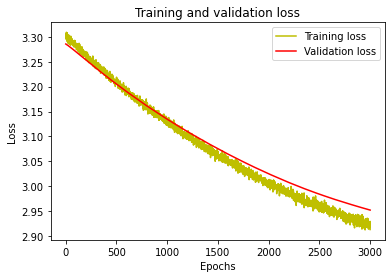

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
#plt.plot(epochs, val_acc, 'b', label = 'Accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
prediction_test = model.predict(X_test)

In [25]:
print(y_test, prediction_test)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0.10589928 0.09085308 0.08467733 ... 0.01065329 0.00766371 0.00718902]
 [0.1126647  0.10687517 0.08702063 ... 0.01041981 0.00782329 0.00651288]
 [0.11537144 0.10523286 0.08664666 ... 0.00999582 0.00751329 0.00650038]
 ...
 [0.10593299 0.1021721  0.08635135 ... 0.01150318 0.00855256 0.00720836]
 [0.11420742 0.1003056  0.08418889 ... 0.01122614 0.00833231 0.00717615]
 [0.11267528 0.09940912 0.08932337 ... 0.01058688 0.00695008 0.00640836]]


In [26]:
np.mean(prediction_test - y_test)**2

1.0991134815301432e-19

In [28]:
val_acc = history.history['val_accuracy']

In [29]:
val_acc

[0.00615384615957737,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.02153846062719822,
 0.02153846062719822,
 0.02153846062719822,
 0.02153846062719822,
 0.02153846062719822,
 0.02153846062719822,
 0.02461538463830948,
 0.02461538463830948,
 0.02769230678677559,
 0.02769230678677559,
 0.03076923079788685,
 0.03076923079788685,
 0.03076923079788685,
 0.03076923079788685,
 0.04307692125439644,
 0.04307692125439644,
 0.04307692125439644,
 0.04307692125439644,
 0.04923076927661896,
 0.04923076927661896,
 0.05538461357355118,
 0.05538461357355118,
 0.05538461357355118,
 0.05230769142508507,
 0.05230769142508507,
 0.05230769142508507,
 0.05230769142508507,
 0.05230769142508507,
 0.0523076